<a href="https://colab.research.google.com/github/opeolipe/analysis/blob/main/Production_Companies_Movie_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# Project: Production Companies Movie Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> I choose TMDB movie dataset for analysis. 
> The data set contains information about 10,000 movies collected from The Movie Database (TMDb).
Data set was from [here](https://www.google.com/url?q=https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd1c4c_tmdb-movies/tmdb-movies.csv&sa=D&ust=1532469042115000) (cleaned from
original data on
[Kaggle](https://www.google.com/url?q=https://www.kaggle.com/tmdb/tmdb-movie-metadata&sa=D&ust=1532469042115000))

> Questions that we want to answer on this analysis :
1. What were the top 10 production company with highest profit? 
2. How many movies that the top production company produce?
3. Which year has the higest profit rate of the top 1 production company? 
4. Who's the top cast and director of the top 1 production company? 
5. Was there any correlation between populartiy, vote average, runtime and budget to profit? 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline 

In [2]:
df = pd.read_csv ("/content/tmdb-movies.csv")

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [4]:
df.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


In [5]:
df.isna().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

> **Observasion from the dataset**
*   Total rows = 10866
*   Total column = 21
*   After seeing the dataset we can say that several columns have null value, especially 'homepage'.
*   Certain columns, like 'cast' and 'genres', contain multiple values separated by pipe (|) characters. 
*   The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.







**### Data Cleaning** (Removing The Unused Information From The Dataset)
> 1.   We need to remove duplicate rows from the dataset. 
2.   Changing format of release date into datetime format.
3.   Remove the unused columns that are not needs in the analysis process. 
4.   Remove the movies that having null value of 'cast' and 'production_companies'.  
5.   Split columns 'cast', 'genres' and 'production_companies'. We are going to use the first value only and remove the rest. 




**1. Remove duplicate rows**

In [6]:
sum(df.duplicated())

1

In [7]:
# After calculating the duplicate rows we can drop drop these row using 'drop_duplicated()' function 
df.drop_duplicates(inplace=True) 

In [8]:
print ("After removing duplicate value (Rows, Columns):", df.shape)

After removing duplicate value (Rows, Columns): (10865, 21)


**2. Changing format of release date into dateime format**

In [9]:
# The release date in dataset is in string format. So we need to change this into dateime format. 
df['release_date'] = pd.to_datetime(df['release_date'])
df['release_date'].head()

0   2015-06-09
1   2015-05-13
2   2015-03-18
3   2015-12-15
4   2015-04-01
Name: release_date, dtype: datetime64[ns]

**3. Remove unused columns that are not needs in the analysis process**
> We can see that 21 columns in the dataset. We can drop column which are not usable in the data analysis process.  
The column like 'imdb_id', 'homepage', 'tagline', 'keywords', 'overview', 'budget_adj', and 'revenue_adj' are not required for my analysis and I will drop these columns. 




In [10]:
df.drop(['imdb_id','homepage','tagline','keywords','overview','budget_adj','revenue_adj'], axis=1, inplace=True)

In [11]:
print ("After removing unused columns (Rows, Columns):",df.shape)

After removing unused columns (Rows, Columns): (10865, 14)


**4. Remove movies that having null value of 'cast' and 'production_companies'**

In [12]:
print("Rows with null value in the cast column:",df['cast'].isnull().sum())
print ("Rows with null value in the production companies column:",df['production_companies'].isnull().sum())

Rows with null value in the cast column: 76
Rows with null value in the production companies column: 1030


In [13]:
df.dropna(inplace=True)

In [14]:
#Rechecking null value after removing. Should print False
df.isnull().sum().any()

False

In [15]:
print("After removing null value rows (Rows, Columns:",df.shape)

After removing null value rows (Rows, Columns: (9772, 14)


In [16]:
df.head(2)

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015


**5. Split column 'cast', 'genres' and 'production_companies'**

In [17]:
#Split cast into main cast and the rest
df[['cast_1','cast_2']] = df['cast'].str.split('|',n=1,expand=True) 

In [18]:
df.head(2)

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,cast_1,cast_2
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,Chris Pratt,Bryce Dallas Howard|Irrfan Khan|Vincent D'Onof...
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,Tom Hardy,Charlize Theron|Hugh Keays-Byrne|Nicholas Houl...


In [19]:
#Let's do it on 'genres' and 'production_companies'
df[['genre_1','genre_2']]= df['genres'].str.split("|",n=1,expand=True)

In [20]:
df[['production_companies_1','production_companies_2']] = df['production_companies'].str.split("|",n=1,expand=True)

In [21]:
#Re-check all column to remove unuse column
df.columns

Index(['id', 'popularity', 'budget', 'revenue', 'original_title', 'cast',
       'director', 'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'cast_1', 'cast_2',
       'genre_1', 'genre_2', 'production_companies_1',
       'production_companies_2'],
      dtype='object')

In [22]:
#Remove unuse column 
df.drop(['cast','cast_2','genres','genre_2','production_companies','production_companies_2'], axis=1, inplace=True)

*Now the dataset is clean and all set, we can start to investigate the data for the question asked.*

<a id='eda'></a>
## Exploratory Data Analysis

> Questions that we want to answer on this analysis :
1. What were the top 10 production company with highest profit? 
2. How many movies that the top production company produce?
3. Which year has the higest profit rate of the top 1 production company? 
4. Who's the top cast and director of the top 1 production company? 
5. Was there any correlation between populartiy, vote average, runtime, and budget to profit? 

### Question 1 : What were the top 10 production company with the highest profit? 

In [23]:
# Calculate profit for each of production company 
# Add a new column in the dataframe name 'profit'
df['profit'] = df['revenue'] - df['budget']

In [24]:
df.head(2)

,id,popularity,budget,revenue,original_title,director,runtime,release_date,vote_count,vote_average,release_year,cast_1,genre_1,production_companies_1,profit
0,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,2015-06-09,5562,6.5,2015,Chris Pratt,Action,Universal Studios,1363528810
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,2015-05-13,6185,7.1,2015,Tom Hardy,Action,Village Roadshow Pictures,228436354


In [25]:
#Grouping the data on production companies and get the summary of their profit
profit_company = df.groupby("production_companies_1").profit.sum().to_frame()

In [26]:
#Find the top 10 of profit company 
top_10 = profit_company.nlargest(10,'profit')

In [27]:
#Since the number will be too big to show in plot, let's conver it into million
top_10 ['profit_millions'] = top_10['profit']/1000000

In [28]:
top_10.head(2)

,profit,profit_millions
production_companies_1,,
Universal Pictures,27820930400,27820.930400
Paramount Pictures,25833847603,25833.847603


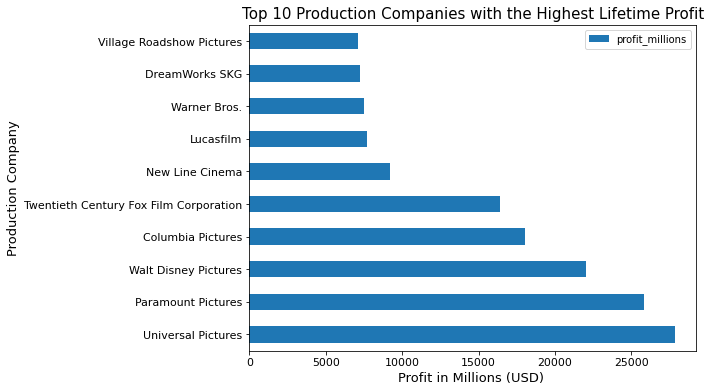

In [29]:
#Plot the bar graph using plot
top_10.plot (y='profit_millions',kind='barh', fontsize =11, figsize =(8,6));

#Set the label and the title of the plot
plt.title ("Top 10 Production Companies with the Highest Lifetime Profit", fontsize = 15)
plt.xlabel("Profit in Millions (USD) ", fontsize = 13)
plt.ylabel("Production Company", fontsize = 13)
sns.set_style("darkgrid")




After seeing the bar chart, we can conclude that Universal Pictures has the higest profit with over USD 25000 Millions followed by Paramount Pictures (over USD 25000 Millions) and Walt Disney Pictures (over USD 2000 Millions)

### Question 2 : How many movies that the top production company produce? 

In [30]:
#Grouping the data on production company with revenue and total of movies 
movies = df.groupby('production_companies_1').id.count()

In [31]:
#Join the profit dataframe with movies
total_movies = profit_company.merge(movies, left_index=True, right_index=True, how='inner')

In [32]:
total_movies.head(5)

,profit,id
production_companies_1,,
10th Hole Productions,-4376180,2
120dB Films,-8498623,3
1492 Pictures,2372547337,4
1818,7232628,1
185 Trax,-4200000,1


In [33]:
#Find the top 10 company with total movies 
total_movies_10 = total_movies.nlargest(10,'profit')
total_movies_10

,profit,id
production_companies_1,,
Universal Pictures,27820930400,460
Paramount Pictures,25833847603,426
Walt Disney Pictures,22008457637,213
Columbia Pictures,18010722358,271
Twentieth Century Fox Film Corporation,16411339087,242
New Line Cinema,9200216172,206
Lucasfilm,7671385005,20
Warner Bros.,7478008723,172
DreamWorks SKG,7231458583,73


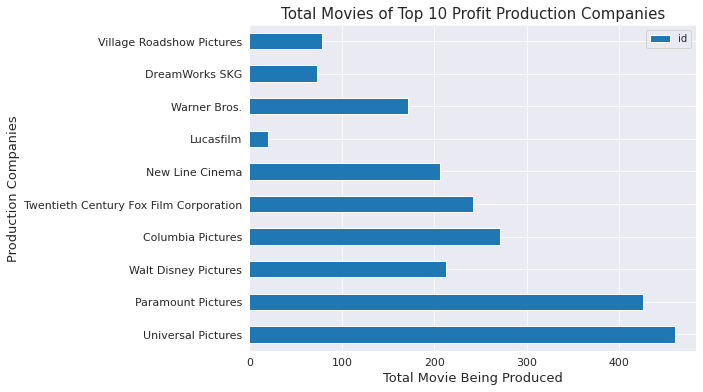

In [34]:
#Plot the bar grap using plot
total_movies_10.plot (y='id',kind = 'barh', fontsize =11, figsize= (8,6));

#Set the label and the title 
plt.title("Total Movies of Top 10 Profit Production Companies", fontsize = 15)
plt.xlabel("Total Movie Being Produced", fontsize =13)
plt.ylabel("Production Companies", fontsize = 13)
sns.set_style('darkgrid')

According to the bar chart, as expected Universal Pictures as the higest profit production company has produced more than others with over 400 movies. On the other hand, Walt Disney Picture as the top third profit production company produced movies lower than Columbia Picture and Twentieh Century Fox Film Corporation. 

Furthermore, Lucasfilm was the outlier only produce 20 movies but was the 7th of top 10 profit production company. 



### Question 3 : Which year has the higest profit rate of the top 1 production company?  

In [35]:
# Filter the dataframe to Universal Pictures only 
df_up = df.query('production_companies_1=="Universal Pictures"')

In [36]:
# Confirm only production company is Universal Pictures
df_up['production_companies_1'].unique()

array(['Universal Pictures'], dtype=object)

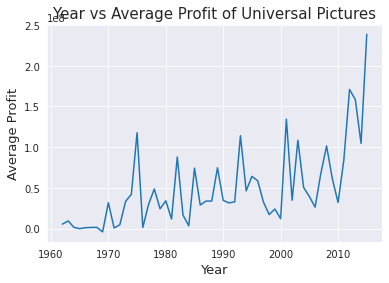

In [37]:
# do year-wise analysis of profit earn by movies in each year
# make the group of the data according their release_year and find the average profit and plot 

df_up.groupby('release_year')['profit'].mean().plot()

# setup the title and label 
plt.title ("Year vs Average Profit of Universal Pictures", fontsize = 15)
plt.xlabel ("Year", fontsize =13)
plt.ylabel ("Average Profit", fontsize =13)

# setup the figure size
sns.set(rc={'figure.figsize': (10,5)})
sns.set_style("whitegrid")


According to the plot year 2015 was the most profitable year for Universal Pictures and the profit was low between year 1960 - 1969. 

### Question 4 : Who's the most frequent cast and director for Universal Pictures?  

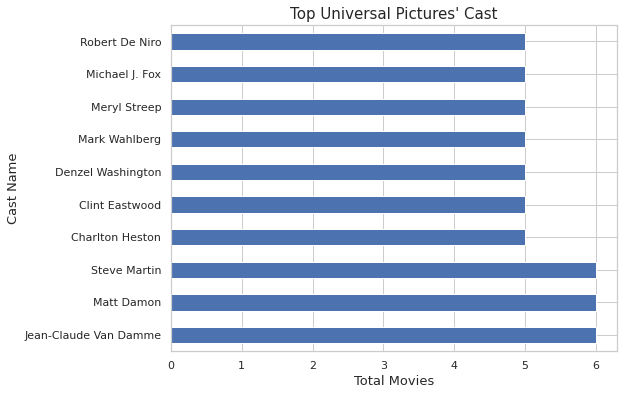

In [38]:
# Group the dataframe based on first cast and count total of movies each cast

cast_up = df_up.groupby('cast_1').id.count()

cast_up = cast_up.nlargest(10)

# Make the plot 
cast_up.plot(y='id',kind='barh',fontsize = 11, figsize =(8,6))

# Set the title and label 
plt.title ("Top Universal Pictures' Cast", fontsize=15)
plt.xlabel ("Total Movies", fontsize=13)
plt.ylabel ("Cast Name", fontsize=13)
sns.set_style("darkgrid")

According to the plot, Universal Pictures has cast Jean-Claude Van Damme, Matt Damon and Steve Martin for 6 movies. Among all of the top 10 casts, Merly Streep was the only female cast. 

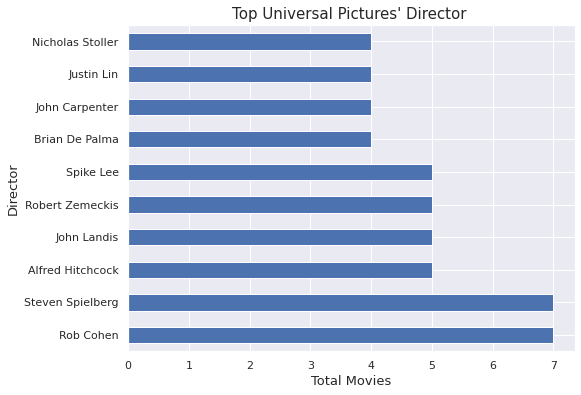

In [39]:
# Let's do the same thing for Director
director_up = df_up.groupby('director').id.count()

director_up = director_up.nlargest(10)

# Make the plot
director_up.plot(y='id',kind='barh', fontsize=11, figsize=(8,6))

# Set the title and label 
plt.title("Top Universal Pictures' Director ", fontsize=15)
plt.xlabel("Total Movies", fontsize=13)
plt.ylabel("Director", fontsize=13)
sns.set_style("darkgrid")

According to the plot, Universal Pictures has Rob Cohen and Steven Spielberg directed 7 movies. 

### Question 5 : Was there any correlation between popularity, vote average, runtime and budget to profit? 


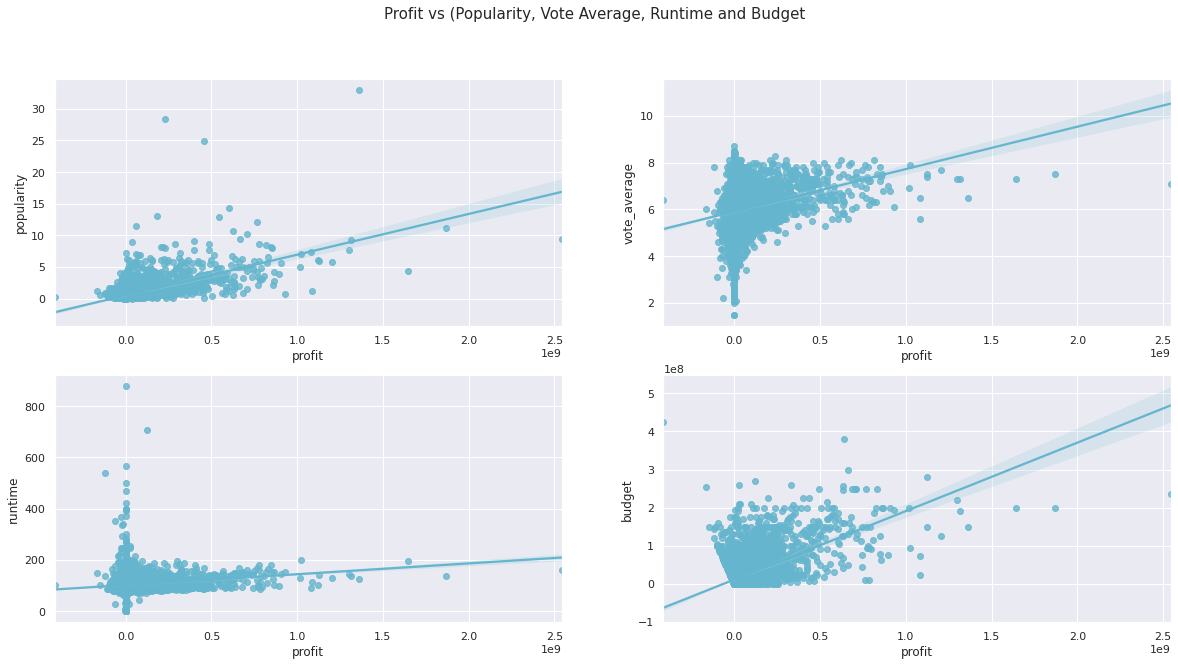

In [40]:
fig, axes = plt.subplots(2,2,figsize=(20,10))
fig.suptitle ("Profit vs (Popularity, Vote Average, Runtime and Budget", fontsize =15)

sns.regplot (x=df['profit'], y=df['popularity'], color='c', ax=axes[0][0])
sns.regplot (x=df['profit'], y=df['vote_average'], color='c', ax=axes[0][1])
sns.regplot (x=df['profit'], y=df['runtime'], color='c', ax=axes[1][0])
sns.regplot (x=df['profit'], y=df['budget'], color='c', ax=axes[1][1])

sns.set_style('whitegrid')

In [41]:
# Let's make the correlation heatmap between them 
def plot_correlation_map( df ):
    corr = df.corr()
    _ , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 240 , 10 , as_cmap = True )
    _ = sns.heatmap(corr,cmap = cmap,square=True, cbar_kws={ 'shrink' : .9 }, ax=ax, annot = True, annot_kws = { 'fontsize' : 12 })

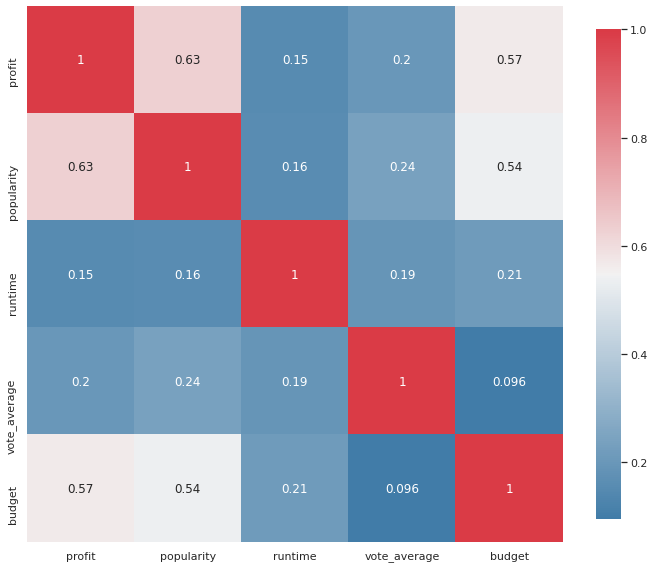

In [42]:
plot_correlation_map (df[['profit','popularity','runtime','vote_average','budget' ]])

A brief description of the above plot. 

**Plot 1 : Popularity vs Profit**
The profit seems to be increasing with popularity. We can say that if the popularity of movie is high then the profit of the movie may be high. 
*   Correlation = 0.63

**Plot 2 : Vote Average vs Profit**
The correlation between vote average and profit is **0.2**. So vote average is not highly related to the profit. 

**Plot 3 : Runtime vs Profit**
The correlation between runtime and profit is **0.15**. So runtime is not highly related to the profit. 

**Plot 4 : Budget vs Profit**
The profit do increase slightly at higher level. We can say that movies with higher investment then the profit may be better. 
*   Correlation = 0.57





<a id='conclusions'></a>
## Conclusions



*   Universal Pictures is the higest profit production company followed by Paramont Pictures and Walt Disney Pictures. 
*   Universal Pictures has produce more than 400 movies since 1960-2015. 
*   At 2015, Universal Pictures has the higest profit, and has the lowest profit between year 1960-1969.
*   Lucasfilm was only produce 20 movies but got on the top 10 lifetime profit production companies. 
*   By producing much movies, production companies not necessarily will get much profit.
*   Movie with high popularity most likely will get high profit, and movie with high investment probably get high profit. 
*   Movie duration doesn't determine the movie profit




Reference :
- https://www.kaggle.com/deepak525/investigate-tmdb-movie-dataset/notebook

- https://jovian.ai/ashutoshnemani3/tmdb-movie-dataset


## Limitation



*   We hypothesized that higher budget movie most likely get high profit, but we need to find it further whether the high budget is because the marketing budget or production budget. With high marketing budget then movie popularity will be higher too. 

*   Universal picture showed that the movie business is profitable since 1960, but if we want to buy their stocks we need the latest data until 2021.



